In [1]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install -U matplotlib #matplotlib library helps to manipulate and graph our data

Requirement already up-to-date: matplotlib in /opt/anaconda3/lib/python3.7/site-packages (3.3.3)
Note: you may need to restart the kernel to use updated packages.


## Import seaborn
Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

In [5]:
pip install seaborn 

Note: you may need to restart the kernel to use updated packages.


## Import required packages 

In [8]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import matplotlib as mpl
import scipy.stats as si

### Get data from yahoo finance 

In [9]:
tick='TSLA' #I choose Tesla as the stock
start="2019-12-07"
end="2020-12-08"
df = yf.download(tick,start,end)

[*********************100%***********************]  1 of 1 completed


In [10]:
df.tail() #view last 4 row of data (data frame)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-12-01,597.590027,597.849976,572.049988,584.760010,584.760010,40382800
2020-12-02,556.440002,571.539978,541.210022,568.820007,568.820007,47775700
2020-12-03,590.020020,598.969971,582.429993,593.380005,593.380005,42552000
2020-12-04,591.010010,599.039978,585.500000,599.039978,599.039978,29401300
2020-12-07,604.919983,648.789978,603.049988,641.760010,641.760010,56309700


### Describe Data and Draw Price Graph

In [11]:
df=df['Adj Close'] #df now become a data series
df.describe().round(2) #describe data 

count    252.00
mean     252.20
std      145.68
min       67.91
25%      135.25
50%      189.06
75%      407.08
max      641.76
Name: Adj Close, dtype: float64

In [13]:
Price = df[-1] #last entry of data - last price
print('The spot price is', round(Price,2))

The spot price is 641.76


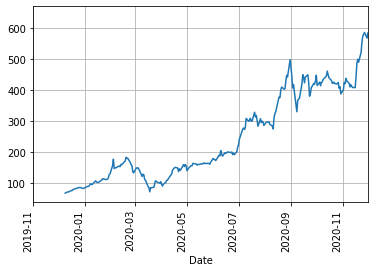

In [14]:
df.plot(label=tick)
plt.xlabel('Date')
#plt.title('Tesla Share Price') I use title in the word document so not included title here
plt.xticks(rotation=90)
plt.xlim('2019-11','2020-12')
plt.grid()

### Calculate return and moving averages and add to new data frame

In [16]:
ret=np.log(df/df.shift(1)) #calculate log return
data=pd.concat([df,ret], axis=1) #combine two series and crate a data frame 
data.columns=['Price', 'Return'] #rename columns
data.dropna(inplace=True) #drop na values
data.tail()

,Price,Return
Date,,
2020-12-01,584.760010,0.029785
2020-12-02,568.820007,-0.027637
2020-12-03,593.380005,0.042271
2020-12-04,599.039978,0.009493
2020-12-07,641.760010,0.068886


In [17]:
w=5                                  # I use 5 days moving averages as Tesla very volatile 
data['min'] = data['Price'].rolling(w).min()
data['max'] = data['Price'].rolling(w).max()
data['std'] = data['Price'].rolling(w).std()
data['mean'] = data['Price'].rolling(w).mean()
data['median'] = data['Price'].rolling(w).median()
data['ewma'] = data['Price'].ewm(halflife=0.5, min_periods=14).mean()
data.dropna().head()

,Price,Return,min,max,std,mean,median,ewma
Date,,,,,,,,
2019-12-30,82.940002,-0.037113,82.940002,86.188004,1.413225,84.819601,85.050003,83.705593
2019-12-31,83.666000,0.008715,82.940002,86.188004,1.445812,84.784001,85.050003,83.675898
2020-01-02,86.052002,0.028119,82.940002,86.188004,1.557061,84.984401,86.052002,85.457976
2020-01-03,88.601997,0.029203,82.940002,88.601997,2.245586,85.467200,86.052002,87.815992
2020-01-06,90.307999,0.019072,82.940002,90.307999,3.148466,86.313600,86.052002,89.684997


/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matpl

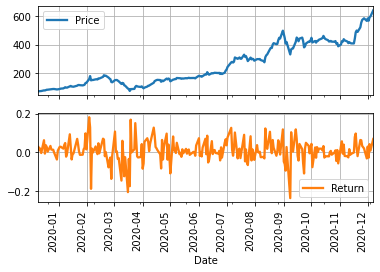

In [18]:
data[['Price','Return']].plot(subplots=True, lw=2.3, grid=True)
plt.xticks(rotation=90)
plt.show()

## Cumulative Returns

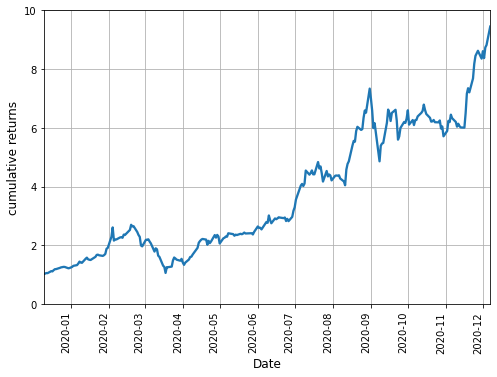

In [19]:
data['Return'].cumsum().apply(np.exp).plot(figsize=(8, 6), lw=2.3)
plt.grid(True)
plt.xticks(rotation=90)
plt.xlabel('Date',fontsize=12)
#plt.title('Tesla Inc. Shares Cumulative Returns', fontsize=20)
plt.ylabel('cumulative returns',fontsize=12)
plt.ylim(0,10)
plt.show()

### Distribution of Stock Return

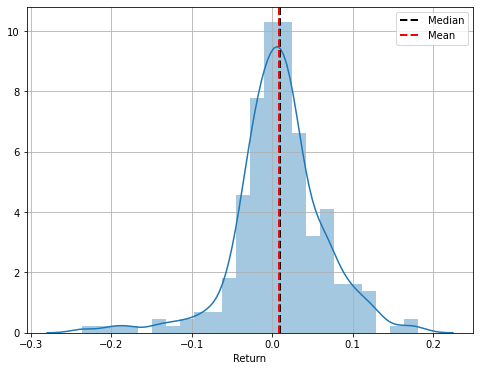

In [20]:
plt.figure(figsize=(8,6))
ax=sns.distplot(data['Return'])
ax.axvline(data['Return'].median(), color='black', ls='--', label='Median',lw=2)
ax.axvline(data['Return'].mean(), color='red', ls='--', label='Mean',lw=2)
plt.legend(loc=0)
plt.grid(True)

In [21]:
data['Return'].describe()

count    251.000000
mean       0.008949
std        0.056064
min       -0.236518
25%       -0.019147
50%        0.009180
75%        0.036447
max        0.181445
Name: Return, dtype: float64

Here I used 5 and 20 days moving averages and compare with the price 

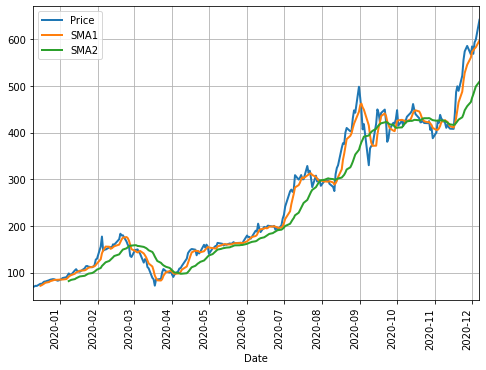

In [32]:
SMA1=5
SMA2=20
data['SMA1'] = data['Price'].rolling(window=SMA1).mean()
data['SMA2'] = data['Price'].rolling(window=SMA2).mean()
data[['Price', 'SMA1', 'SMA2']].plot(figsize=(8,6), grid=True, lw=2)
#plt.title('Moving Averages and Price')
plt.xticks(rotation=90)
plt.show()


## Option Pricing 


### MonteCarlo Simulation
Monte Carlo simulation is a widely used model to simulate the price of an underlying assets. Here we use 3000 simulation to simulate prices. Then we use payoff function max(K-S,0) to value put option

In [36]:
def mcs_simulation_np(p):
    M = p
    I = p
    dt = T / M 
    S = np.zeros((M + 1, I))
    S[0] = S0 
    rn = np.random.standard_normal(S.shape) 
    for t in range(1, M + 1): 
        S[t] = S[t-1] * np.exp((r - sigma ** 2 / 2) * dt + sigma * np.sqrt(dt) * rn[t]) 
    return S

In [38]:
T = 1/12                                              # one month maturity or time to expiration
r = 0.96/100                                          # US risk free rate as of December 08,2020
sigma = data['Return'].std()*np.sqrt(len(data))       #annual volatility 
S0 = data['Price'][-1]                                #last price of the stock
K = 650                                               #strike price
q=0                                                   #tesla do not pay divident

In [39]:
S = mcs_simulation_np(3000) # 3000 simulations for the stock price
S = np.transpose(S)
S

array([[641.76000977, 640.76859576, 643.90560884, ..., 379.95708579,
        380.75063614, 379.45531114],
       [641.76000977, 642.0220067 , 642.36710837, ..., 507.63362552,
        506.55073125, 506.65902622],
       [641.76000977, 640.5423081 , 641.27918722, ..., 699.31720321,
        698.69171523, 694.8389527 ],
       ...,
       [641.76000977, 642.10226739, 637.79482657, ..., 709.7350243 ,
        711.04606547, 706.98271374],
       [641.76000977, 643.27407191, 645.29377987, ..., 733.95388639,
        730.63915978, 735.61211034],
       [641.76000977, 641.31276681, 645.2131404 , ..., 829.1164581 ,
        827.12948551, 825.32584444]])

Text(0, 0.5, 'Frequency')

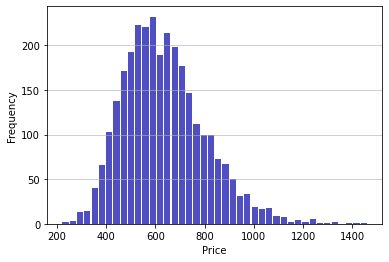

In [40]:
import matplotlib.pyplot as plt
n, bins, patches = plt.hist(x=S[:,-1], bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('Price')
plt.ylabel('Frequency')
#plt.title('Frequency distribution of the simulated end-of-preiod values')

In [41]:
print('Mean of Simulated Prices is {} and standard deviation is "{}!"'.format(S.mean().round(2), S.std().round(2)))

Mean of Simulated Prices is 638.2 and standard deviation is "117.48!"


In [42]:
p = np.mean(np.maximum(K - S[:,-1],0))
print('European put', str(p))

European put 73.32133887123376


## Black Scholes Merton Model
Black Scholes Merton model uses last price,strike, time to expiry, risk free rate, divident yield and annual volatility to price option. We use same values that we used for MCS to price put option unde BSM.

In [43]:
def euro_put_bsm(S, K, T, r, q, vol):
    
    #S: spot price
    #K: strike price
    #T: time to maturity
    #r: risk free rate
    #q: continuous dividend yield
    #vol: volatility of underlying asset
 
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    #if payoff == "call":
        
    #option_value = S * np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    #elif payoff == "put":
    option_value =  - S * np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0) + K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0,1.0)
    
    return option_value

In [44]:
euro_put_bsm(S0,K,T,r,q,sigma)

69.79186579890393

In [45]:
TX = np.linspace(0.25,3,12) #create 12 values between 0.25 and 3
cpd = np.zeros((len(TX),1))
for i in range(len(TX)):
    cpd [i] = euro_put_bsm(S0, K, TX[i], r, q, sigma) # for each maturity crate an option value

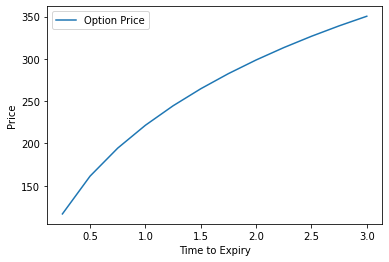

In [46]:
fig = plt.figure()
plt.plot(TX, cpd, '-')
plt.xlabel('Time to Expiry')
plt.ylabel('Price')
#plt.title('European Put')
plt.legend(['Option Price'])

In [47]:
SI = np.linspace(300,900,11)               #start 300 and stop 900 with 11 points, tesla very volatile 
cp = np.zeros((len(SI),1))
for i in range(len(SI)):
    cp[i] = euro_put_bsm(SI[i], K, T, r, q, sigma)

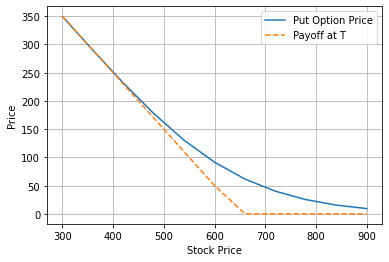

In [48]:
fig = plt.figure()
plt.plot(SI, cp, '-')                    #stock price and option prce
plt.plot(SI, np.maximum(K-SI,0), '--')   # stock price and payoff 
plt.xlabel('Stock Price')
plt.ylabel('Price')
#plt.title('European Put')
plt.legend(['Put Option Price','Payoff at T'])
plt.grid()

## Greeks

### Delta 
The measure of option price sensitivity to stock price, first derivative of the option price with respect to stock price 

In [49]:
def delta(S, K, T, r, q, vol):#use same parameters with BSM
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    delta =  - np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0)
    
    return delta

In [52]:
delta(S0, K, T, r, q, sigma)

-0.4674960790657928

In [53]:
SD = np.linspace(S0-400,S0+500,51) #create an array for x axis
Delta_Put = np.zeros((len(SD),1))  #initiate delta as len(SD)x1 array 
for i in range(len(SD)):
    Delta_Put [i] = delta(SD[i], K, T, r, q, sigma)

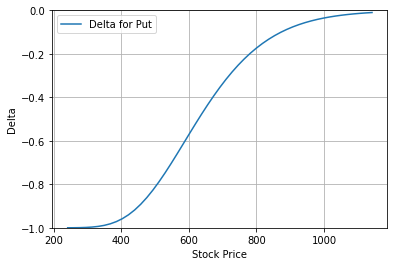

In [55]:
fig = plt.figure()
plt.plot(SD, Delta_Put, '-')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Delta')
#plt.title('Delta')
plt.ylim(-1,0)
plt.legend(['Delta for Put'])
plt.show()

In [56]:
SD1=np.linspace(S0-200,S0+200,51) #Instead of S, SD is taken to avoid variable changes 
TD=np.linspace(0.5,2,31)        #instead of T, we used TD because we use T for inital valuues above 
Delta = np.zeros((len(TD),len(SD1)))
for j in range(len(SD1)):
    for i in range(len(TD)):
        Delta[i,j] = delta(SD1[j], K, TD[i], r, q, r)

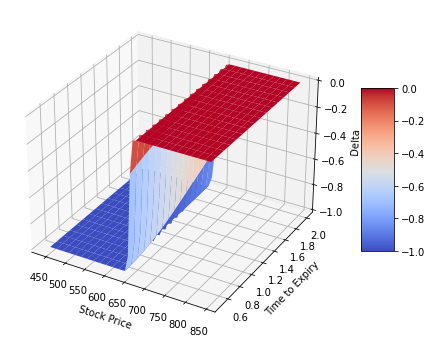

In [57]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d') #Get the current Axes instance on the current figure matching the given keyword args.
SD1, TD = np.meshgrid(SD1, TD) # extend dimention of the matrix (2D to 3D)
surf = ax.plot_surface(SD1, TD, Delta, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Delta')
fig.colorbar(surf, shrink=0.5, aspect=5);

### Gamma
estimate delta sensitivity to price change of underlying

In [58]:
def gamma(S, K, T, r, q, vol):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    gamma = np.exp(-r * T) * si.norm.pdf(d1, 0.0, 1.0) / (vol * S * T)
    
    return gamma

In [45]:
gamma(S0, K, T, r, q, sigma)

0.008363909713241056

In [59]:
SG = np.linspace(S0-300,S0+300,21)
Gamma = np.zeros((len(SG),1))
for i in range(len(SG)):
    Gamma [i] = gamma(SG[i], K, T, r, q, sigma)

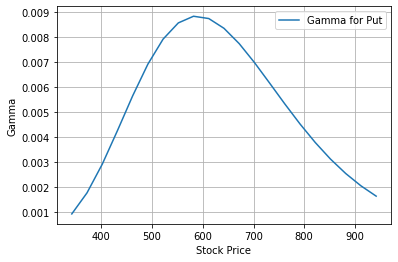

In [60]:
fig = plt.figure()
plt.plot(SG, Gamma, '-')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Gamma')
#plt.title('Gamma')
plt.legend(['Gamma for Put'])

### Speed
measures gamma sensitivity to price change. It is third derivative of option price wrt stock price

In [61]:
def speed(S, K, T, r, q, vol):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    speed = np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0) / ((vol **2) * (S**2) * T) * (d1 + vol * np.sqrt(T))
    
    return speed

In [62]:
speed(S0,K,T,r,q,sigma)

4.963018603507611e-06

In [63]:
SP = np.linspace(S0-300,S0+300,21)
Speed = np.zeros((len(SP),1))
for i in range(len(SP)):
    Speed [i] = speed(SP[i], K, T, r, q, sigma)

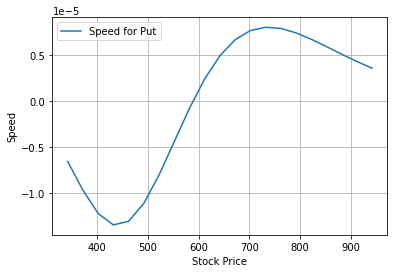

In [64]:
fig = plt.figure()
plt.plot(SP, Speed, '-')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Speed')
#plt.title('Speed')
plt.legend(['Speed for Put'])

### Vega
estimate option price sensitivity to percent change in impled volatility 

In [65]:
def vega(S, K, T, r, q, vol):
    # theata of put option
    #S: stock price
    #K: strike price 
    # r: annual risk free rate
    #q: divident yield
    #vol: annual volatility 
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    vega = S * np.sqrt(T) * np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0)
    
    return vega

In [66]:
vega(S0, K, T, r, q, sigma)

73.66266467313854

In [67]:
vol = np.linspace(0.1,0.8,21)
Vega = np.zeros((len(vol),1))
for i in range(len(vol)):
    Vega [i] = vega(S0, K, T, r, q, vol[i])

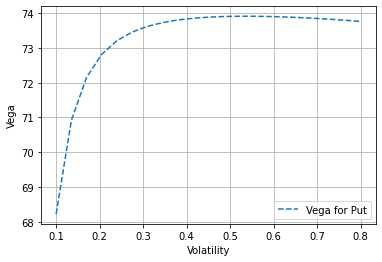

In [68]:
fig = plt.figure()
plt.plot(vol, Vega, '--')
plt.grid()
plt.xlabel('Volatility')
plt.ylabel('Vega')
#plt.title('Vega')
plt.legend(['Vega for Put'])

In [69]:
SV = np.linspace(S0-300,S0+300,51)
TV = np.linspace(0.5, 2, 51)
Vega = np.zeros((len(TV),len(SV)))
for j in range(len(SV)):
    for i in range(len(TV)):
        Vega[i,j] = vega(SV[j], K, TV[i], r, q, sigma)

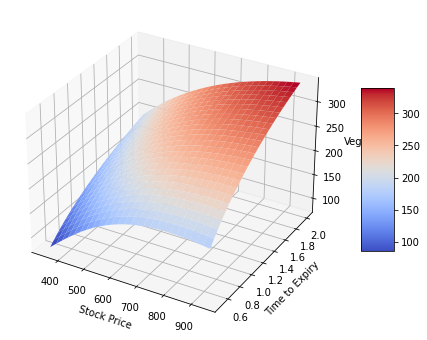

In [70]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d') #3d plot 
SV, TV = np.meshgrid(SV, TV) 
surf = ax.plot_surface(SV, TV, Vega, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Vega')
fig.colorbar(surf, shrink=0.5, aspect=5);

## Theta 

In [71]:
def theta(S, K, T, r, q, vol):
    # theata of put option
    #S: stock price
    #K: strike price 
    # r: annual risk free rate
    #q: divident yield
    #vol: annual volatility 
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    
    theta = vol * S * np.exp(-q * T) * si.norm.pdf(-d1, 0.0, 1.0) / (2 * np.sqrt(T)) - q * S * np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return theta

In [72]:
theta(S0, K, T, r, q, sigma )

396.1191004928639

In [73]:
 TH= np.linspace(0.25,3,12)

Theta = np.zeros((len(TH),1))
for i in range(len(TH)):
    Theta[i] = theta(S0, K, TH[i], r, q, sigma)

Text(0, 0.5, 'Theta')

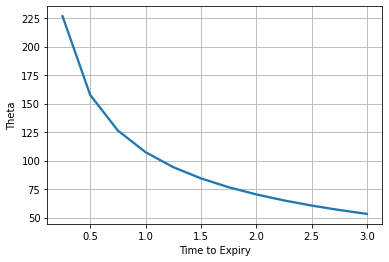

In [74]:
fig = plt.figure()
plt.plot(TH, Theta, '-', lw=2.3)
plt.grid()
plt.xlabel('Time to Expiry')
plt.ylabel('Theta')
#plt.title('Theta')
#plt.legend( 'Theta for Put')

In [75]:
SHX = np.linspace(S0-300,S0+300,51)
THX = np.linspace(0.5, 2, 51)
Theta = np.zeros((len(THX),len(SHX)))
for j in range(len(SHX)):
    for i in range(len(THX)):
        Theta[i,j] = theta(SHX[j], K, THX[i], r, q, sigma)

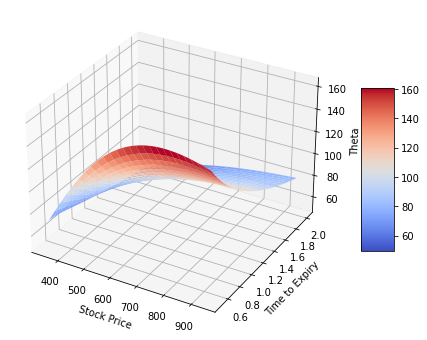

In [76]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
SHX, THX = np.meshgrid(SHX, THX)
surf = ax.plot_surface(SHX, THX, Theta, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Theta')
fig.colorbar(surf, shrink=0.5, aspect=5);